In [3]:
from google.colab import drive
drive.mount('/googledrive')

Mounted at /googledrive


In [7]:
!ls /googledrive/MyDrive/GSSOC24/mask/

Face_Mask_Detection.ipynb  test  with_mask  without_mask


In [10]:
import os
import numpy as np
import cv2
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt


In [8]:
with_mask_path = '/googledrive/MyDrive/GSSOC24/mask/with_mask'
without_mask_path = '/googledrive/MyDrive/GSSOC24/mask/without_mask'


In [11]:
# Load images and labels
def load_images_and_labels(folder_path, label):
    images = []
    labels = []
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, (128, 128))
            images.append(img)
            labels.append(label)
    return images, labels

with_mask_images, with_mask_labels = load_images_and_labels(with_mask_path, 1)
without_mask_images, without_mask_labels = load_images_and_labels(without_mask_path, 0)

# Combine datasets
images = with_mask_images + without_mask_images
labels = with_mask_labels + without_mask_labels

# Convert to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Normalize images
images = images / 255.0

# Train-test split (75% train, 25% test)
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.25, random_state=42, stratify=labels)

# Convert labels to categorical (one-hot encoding)
y_train = to_categorical(y_train, 2)
y_test = to_categorical(y_test, 2)


In [12]:
# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])


In [13]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

print("Classification Report:")
print(classification_report(y_test_classes, y_pred_classes))

print("Accuracy Score:")
print(accuracy_score(y_test_classes, y_pred_classes))


Epoch 1/10
21/21 [==============================] - 30s 1s/step - loss: 0.7062 - accuracy: 0.6456 - val_loss: 0.3420 - val_accuracy: 0.8964
Epoch 2/10
21/21 [==============================] - 34s 2s/step - loss: 0.3342 - accuracy: 0.8739 - val_loss: 0.3255 - val_accuracy: 0.9144
Epoch 3/10
21/21 [==============================] - 26s 1s/step - loss: 0.3111 - accuracy: 0.8739 - val_loss: 0.3049 - val_accuracy: 0.9144
Epoch 4/10
21/21 [==============================] - 30s 1s/step - loss: 0.2536 - accuracy: 0.9069 - val_loss: 0.3249 - val_accuracy: 0.9009
Epoch 5/10
21/21 [==============================] - 28s 1s/step - loss: 0.2140 - accuracy: 0.9144 - val_loss: 0.2564 - val_accuracy: 0.9144
Epoch 6/10
21/21 [==============================] - 28s 1s/step - loss: 0.1658 - accuracy: 0.9354 - val_loss: 0.2149 - val_accuracy: 0.9189
Epoch 7/10
21/21 [==============================] - 26s 1s/step - loss: 0.1363 - accuracy: 0.9520 - val_loss: 0.1907 - val_accuracy: 0.9369
Epoch 8/10
21/21 [==

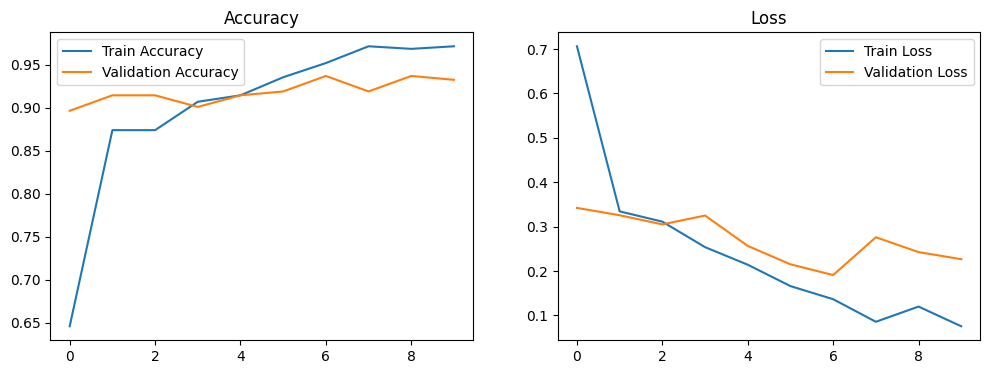

In [15]:
# Plot accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.show()

In [17]:
model.save('/googledrive/MyDrive/GSSOC24/mask/face_mask_detection_model.h5')


7/7 [==============================] - 2s 257ms/step


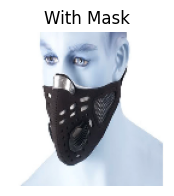

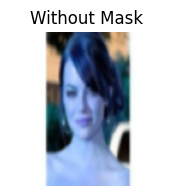

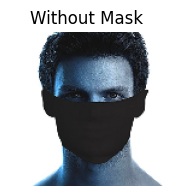

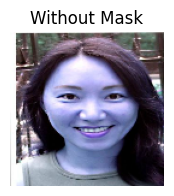

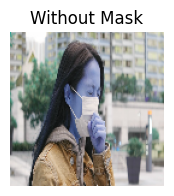

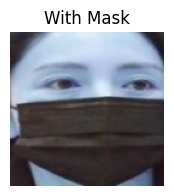

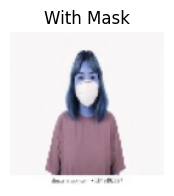

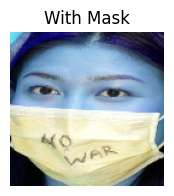

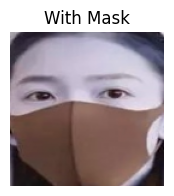

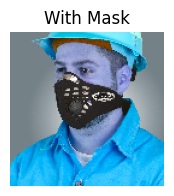

In [18]:

# Load the model and predict images
from tensorflow.keras.models import load_model

model = load_model('face_mask_detection_model.h5')

# Function to display images with predictions
def display_images_with_predictions(images, predictions, max_images=10):
    num_images = min(len(images), max_images)
    for i in range(num_images):
        plt.figure(figsize=(2, 2))
        plt.imshow(images[i])
        plt.title("With Mask" if predictions[i] == 1 else "Without Mask")
        plt.axis('off')
        plt.show()

# Predict on test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Display test images with predictions
display_images_with_predictions(X_test, y_pred_classes)